In [7]:
# install.packages("dplyr")
# install.packages("ggplot2")
library(dplyr)
library(ggplot2)

### Facetas

In [6]:
mpg2 <- mpg %>% 
  filter(
      cyl != 5,
      drv %in% c("4", "f"),
      class != "compact"
  )

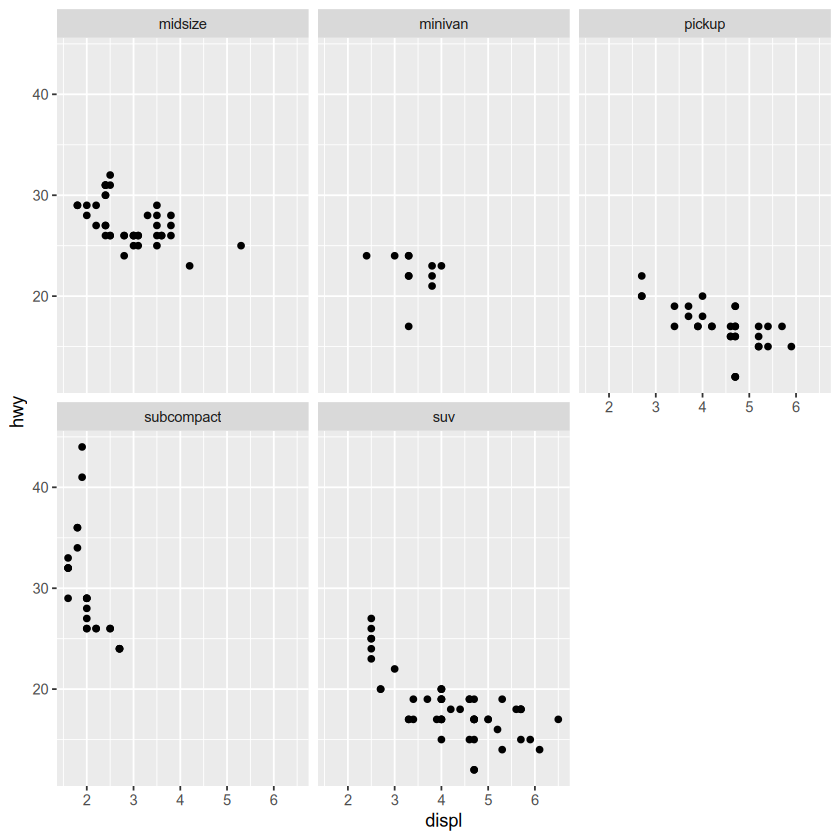

In [9]:
ggplot(mpg2, aes(displ, hwy)) +
  geom_point() +
  labs(NULL, NULL) +
  facet_wrap(~class, ncol = 3) # Segmentar una gráfica en múltiples

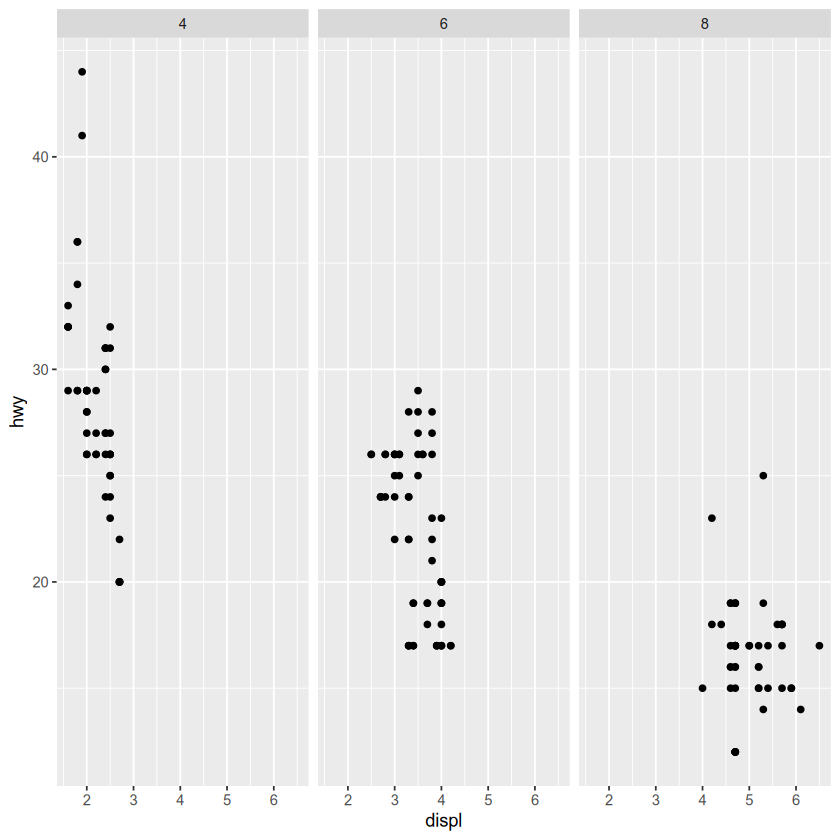

In [10]:
ggplot(mpg2, aes(displ, hwy)) +
  geom_point() +
  labs(NULL, NULL) +
  facet_grid(. ~ cyl) # Distribuir a lo largo de las columnas

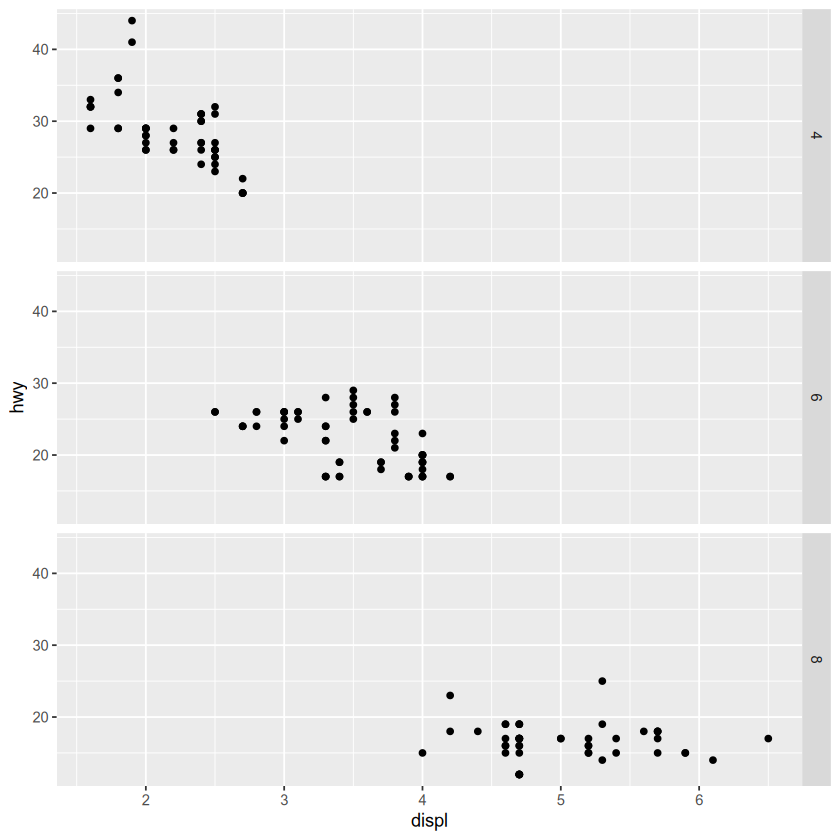

In [11]:
ggplot(mpg2, aes(displ, hwy)) +
  geom_point() +
  labs(NULL, NULL) +
  facet_grid(cyl ~ .) # Distribuir a lo largo de las filas

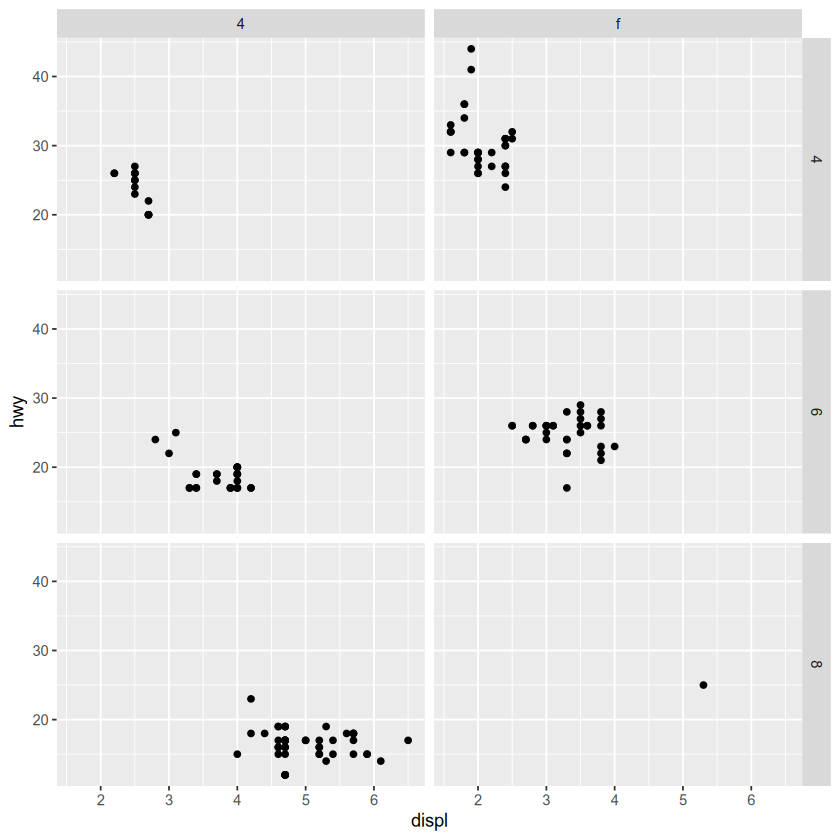

In [12]:
ggplot(mpg2, aes(displ, hwy)) +
  geom_point() +
  labs(NULL, NULL) +
  facet_grid(cyl ~ drv) # Genera una distribución como producto carteasiano

### Control de escalas en el facetado
Personalizar las escalas dependiendo las necesidades

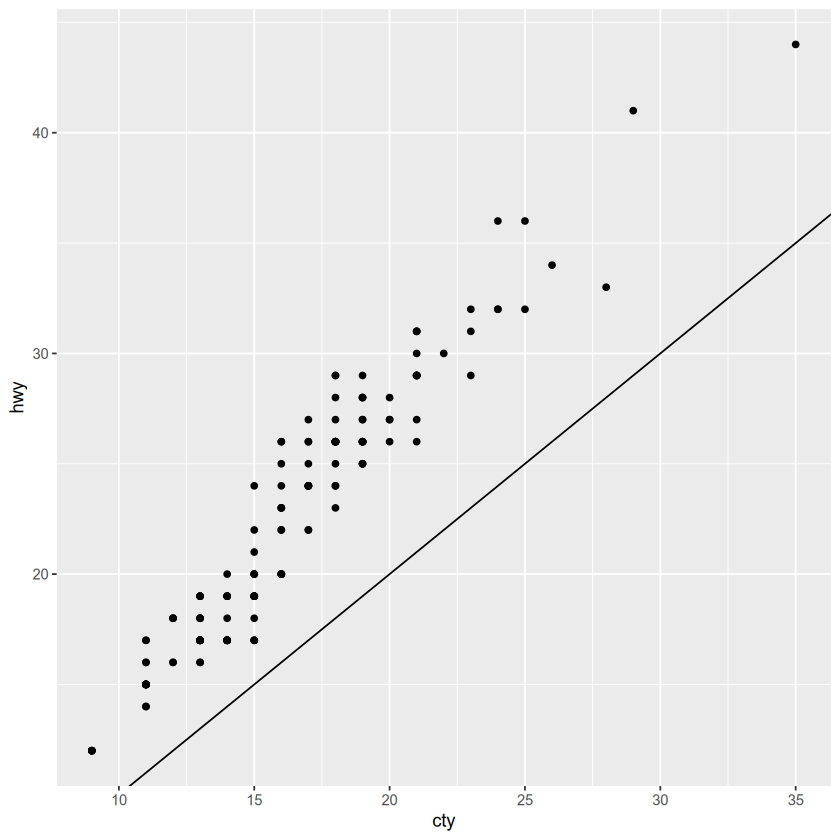

In [16]:
ggplot(mpg2, aes(cty, hwy)) +
  geom_point() +
  geom_abline()

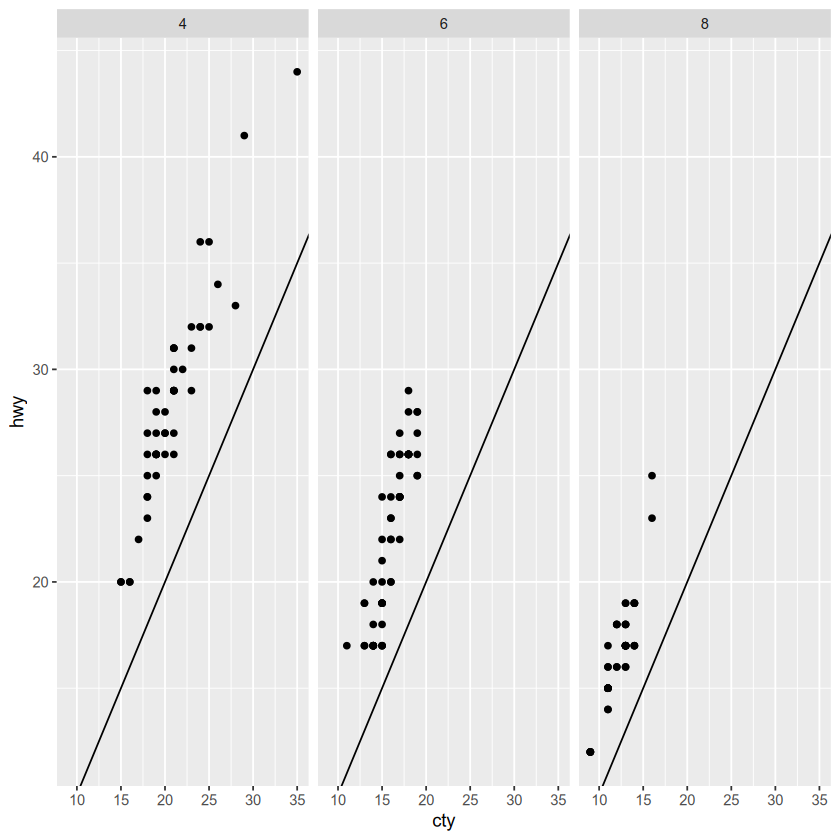

In [17]:
ggplot(mpg2, aes(cty, hwy)) +
  geom_point() +
  geom_abline() +
  facet_wrap(~cyl) # Las escalas son iguales para x y y (scales = "fixed")

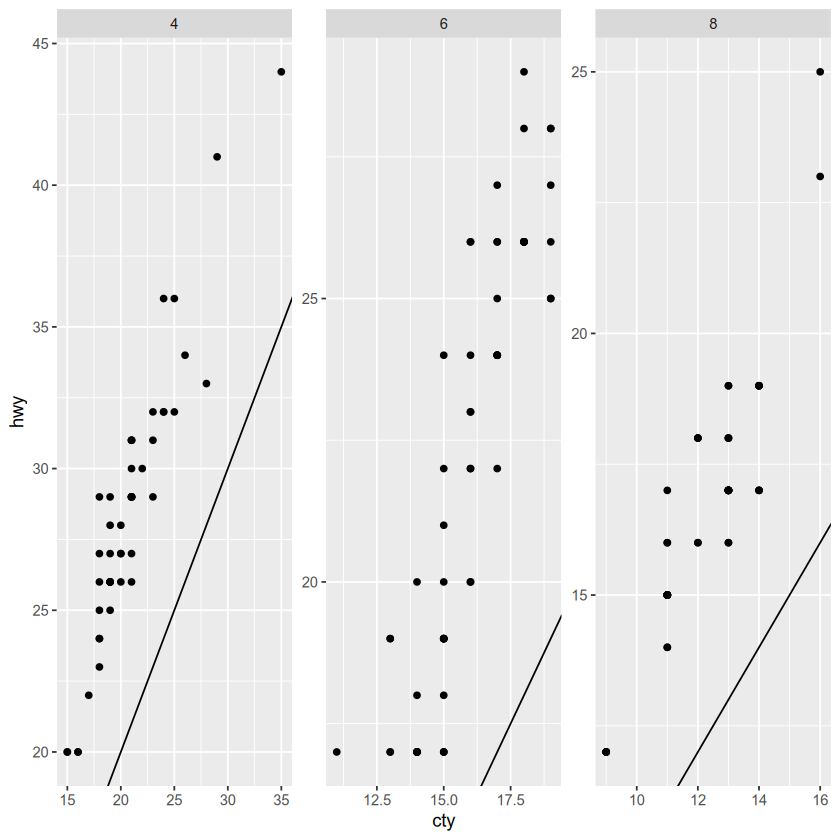

In [18]:
ggplot(mpg2, aes(cty, hwy)) +
  geom_point() +
  geom_abline() +
  facet_wrap(~cyl, scales = "free") # X y y son libres, free_x, free_y

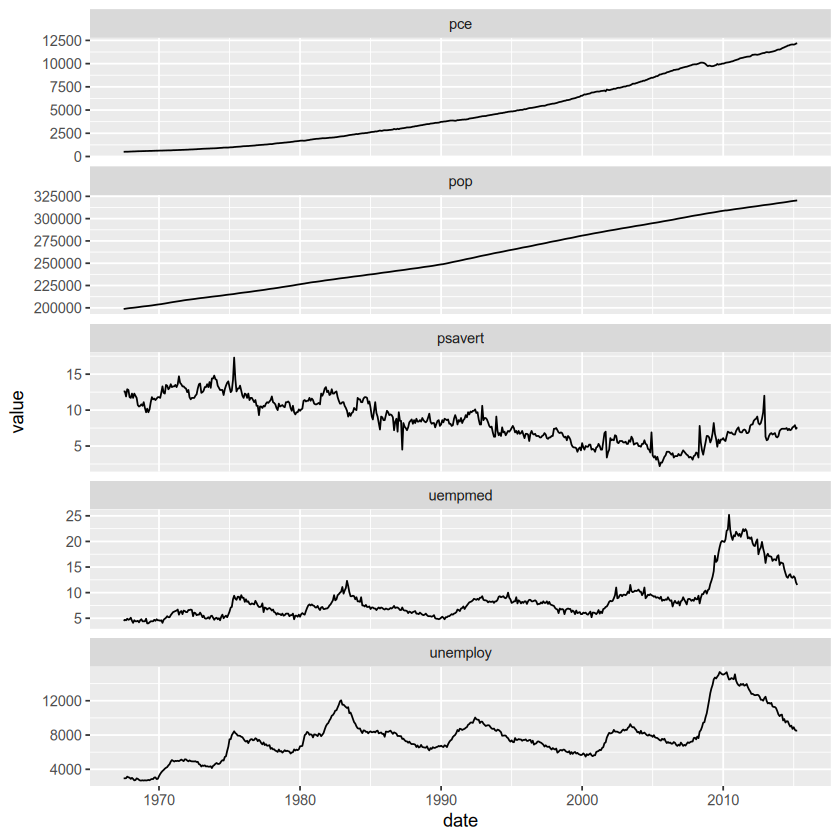

In [20]:
# Las escalas libres se recomiendan en series de tiempo.
ggplot(economics_long, aes(date, value)) +
  geom_line() +
  facet_wrap(~variable, scales = "free_y", ncol = 1)

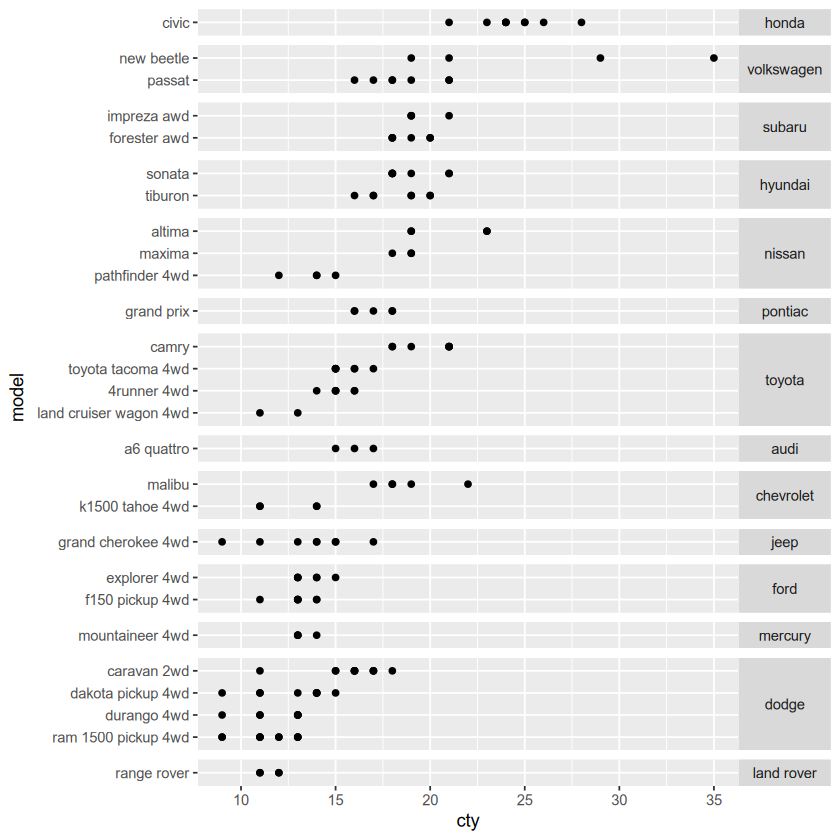

In [26]:
mpg2$model <- reorder(mpg2$model, mpg2$cty)
mpg2$manufacturer <- reorder(mpg2$manufacturer, -mpg2$cty)
ggplot(mpg2, aes(cty, model)) +
  geom_point() +
  facet_grid(
      manufacturer ~ .,
      scales = "free",
      space = "free" # Para que el tamaño de la amplitud individual se adapte
  ) +
  theme(strip.text.y = element_text(angle = 0))

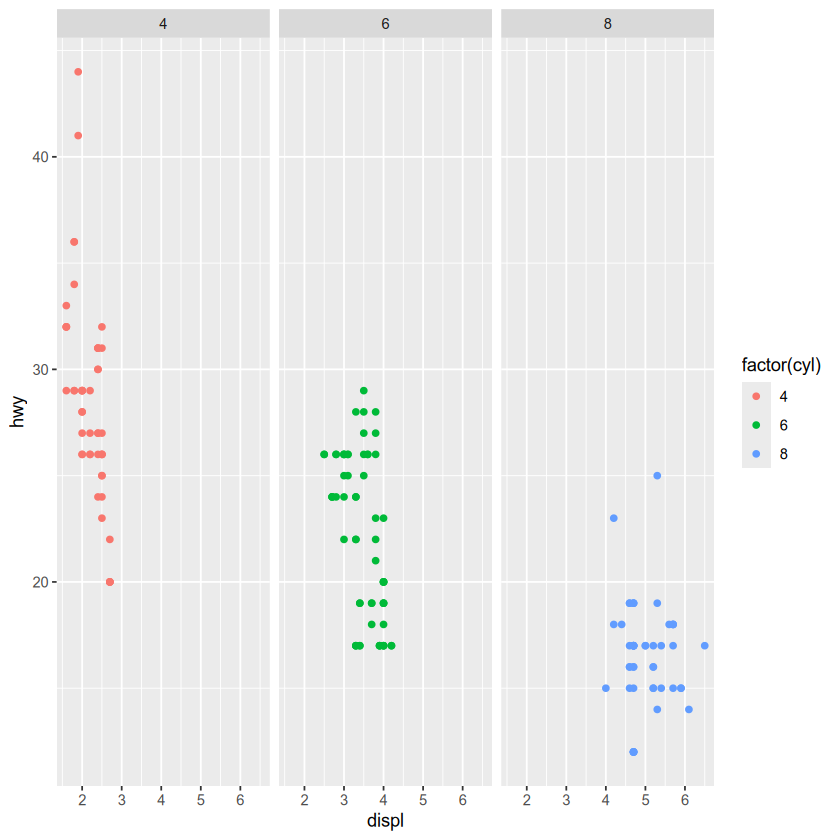

In [28]:
ggplot(mpg2, aes(displ, hwy)) +
  geom_point(aes(color = factor(cyl))) + # Agregando colores
  facet_wrap(~cyl)

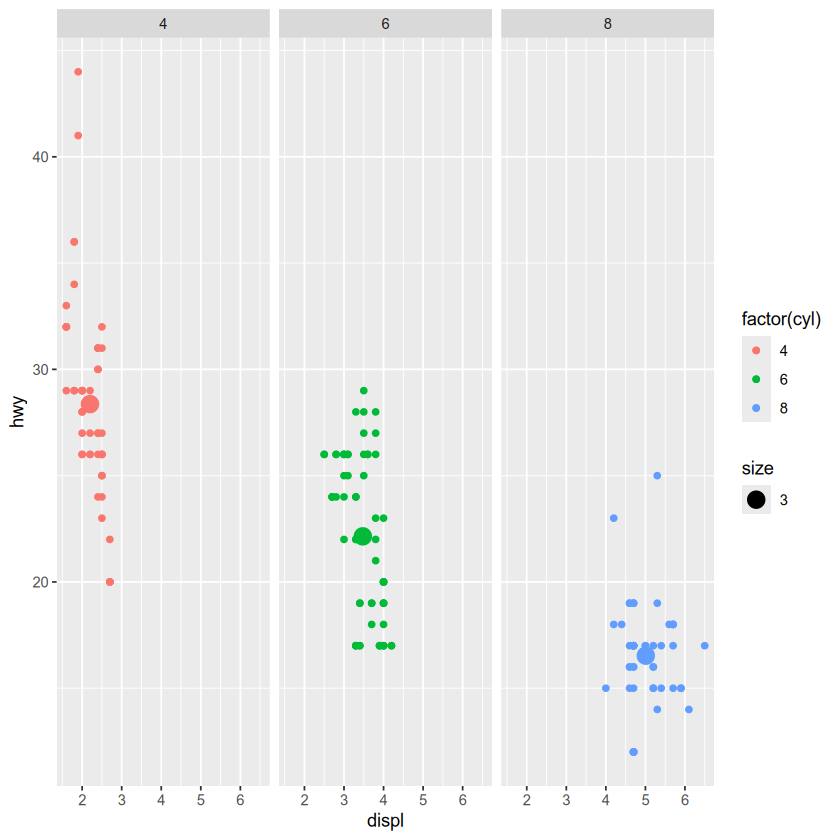

In [35]:
# Anotaciones en el facetado
medias <- mpg2 %>% 
  group_by(cyl) %>%
  summarise(displ = mean(displ), hwy = mean(hwy)) %>%
  rename(cyl = cyl)

ggplot(mpg2, aes(displ, hwy)) +
  geom_point(aes(color = factor(cyl))) +
  geom_point(data = medias, aes(color = factor(cyl), size = 3)) +
  facet_wrap(~cyl)

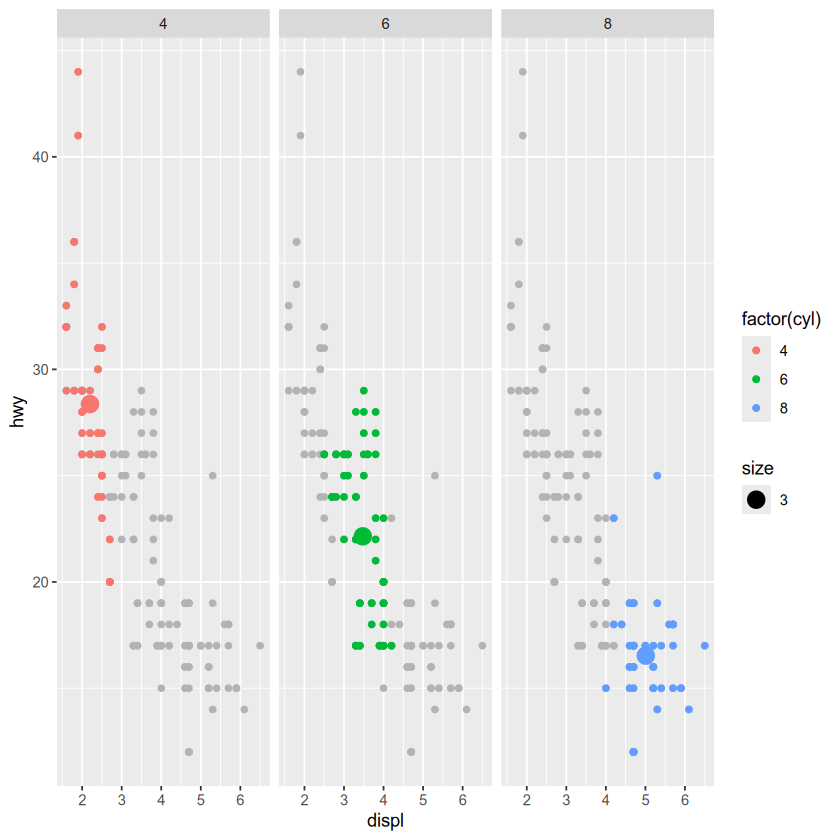

In [42]:
# Resaltar fondo + facetas en gris
mpg22 <- dplyr::select(mpg2, -cyl)

ggplot(mpg2, aes(displ, hwy)) +
  geom_point(data = mpg22, color = "grey70", aes(color = factor(cyl))) +
  geom_point(aes(color = factor(cyl))) +
  geom_point(data = medias, aes(color = factor(cyl), size = 3)) +
  facet_wrap(~cyl)

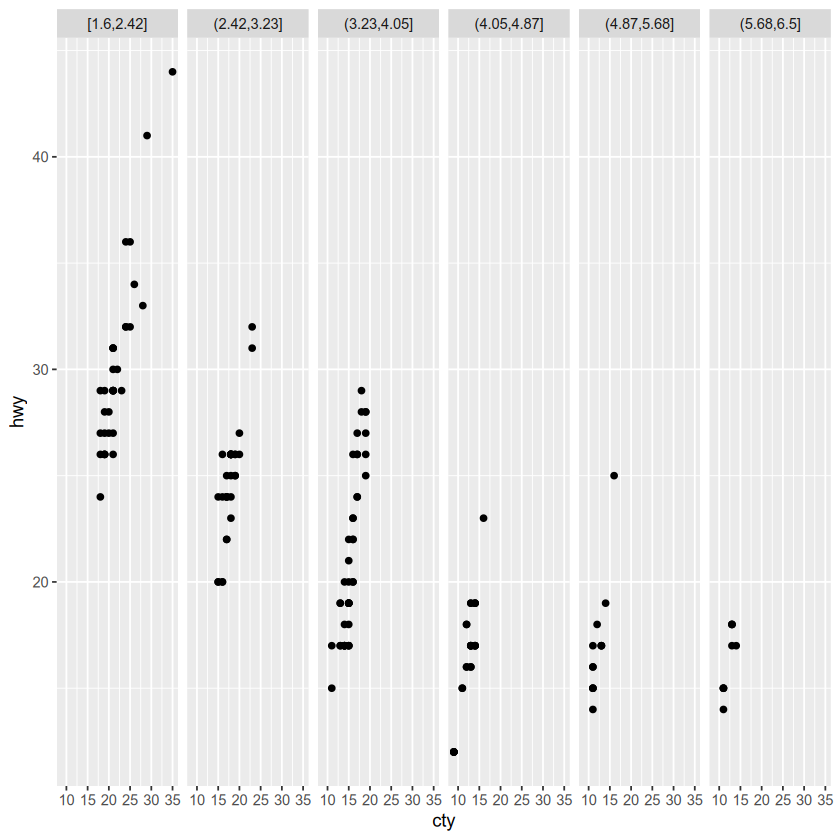

In [45]:
# Facetas de variables continuas
# cut_interval(x, n) Divide en n subintervalos, cada uno de la misma longitud
# cut_width(x, width) Divide en subintervalos de cierta amplitud
# cut_number(x, n) Divide los datos en n subintervalos, cada uno con la misma cantidad de puntos
mpg2$disp_i <- cut_interval(mpg2$displ, 6)
ggplot(mpg2, aes(cty, hwy)) +
  geom_point() +
  facet_wrap(~disp_i, nrow = 1)